In [52]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/heart_disease.csv")
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns_to_encode=["education","Gender","Heart_ stroke","prevalentStroke"]
for columns in columns_to_encode:
  data[columns]=le.fit_transform(data[columns])

data = data.fillna(data.mean())

x=data.drop(columns=["Heart_ stroke"])

y=data["Heart_ stroke"]
data.head()


,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,3,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [54]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
random_forest_model = RandomForestClassifier()

random_forest_model.fit(x_train,y_train)


RandomForestClassifier()

In [56]:
accuracy=random_forest_model.score(x_test,y_test)
print("accuracy=",accuracy)

accuracy= 0.8466981132075472


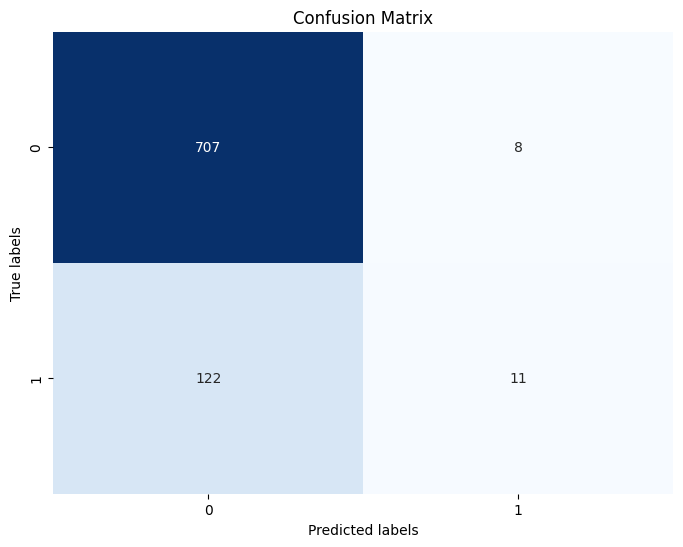

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = random_forest_model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()